# import necessary files for training 

In [1]:
from keras.datasets import mnist
from keras import models,layers,callbacks
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from time import sleep,time

Using TensorFlow backend.


# add call backs

In [2]:
class My_Callback(callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
        sleep(10)

# read and pretrain data

In [3]:
(traindata,trainlabel),(testdata,testlabel) = mnist.load_data()

# show some of train data

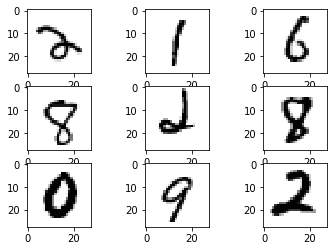

In [4]:
plt.subplot(3,3,1)
plt.imshow(traindata[randint(0,len(traindata))],cmap='binary')
plt.subplot(3,3,2)
plt.imshow(traindata[randint(0,len(traindata))],cmap='binary')
plt.subplot(3,3,3)
plt.imshow(traindata[randint(0,len(traindata))],cmap='binary')
plt.subplot(3,3,4)
plt.imshow(traindata[randint(0,len(traindata))],cmap='binary')
plt.subplot(3,3,5)
plt.imshow(traindata[randint(0,len(traindata))],cmap='binary')
plt.subplot(3,3,6)
plt.imshow(traindata[randint(0,len(traindata))],cmap='binary')
plt.subplot(3,3,7)
plt.imshow(traindata[randint(0,len(traindata))],cmap='binary')
plt.subplot(3,3,8)
plt.imshow(traindata[randint(0,len(traindata))],cmap='binary')
plt.subplot(3,3,9)
plt.imshow(traindata[randint(0,len(traindata))],cmap='binary')
plt.show()

# Change labels onehot

In [5]:
def to_one_hot(labels,dimention = 10):
    resalts = np.zeros((len(labels),dimention))
    for i , labels in enumerate(labels):
        resalts[i,labels] = 1.
    return resalts

In [6]:
train_y = to_one_hot(trainlabel)

In [7]:
test_y = to_one_hot(testlabel)

# reshape input data for train

In [8]:
testdata_ = testdata
traindata = traindata.reshape(traindata.shape[0], 28, 28, 1)
testdata = testdata.reshape(testdata.shape[0], 28, 28, 1)

In [9]:
train_x = traindata.astype('float32')
test_x = testdata.astype('float32')
train_x /= 255
test_x /= 255

# Separate train and validation

In [10]:
pre_train_x = train_x[1000:]
pre_train_y = train_y[1000:]
val_x =train_x[:1000]
val_y = train_y[:1000]

# create model for train 

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# compile model with Specific optimizer and lost function

In [12]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

# fit model for train with timer

In [13]:
start_time=time()
history = model.fit(pre_train_x,pre_train_y,epochs=5,batch_size=64 , validation_data=(val_x,val_y),callbacks=[My_Callback()])
print('Training took {} seconds'.format(time()-start_time))

Train on 59000 samples, validate on 1000 samples
Epoch 1/5
59000/59000 [==============================] - 69s 1ms/step - loss: 0.1785 - acc: 0.9437 - val_loss: 0.0853 - val_acc: 0.9810
Epoch 2/5
59000/59000 [==============================] - 70s 1ms/step - loss: 0.0475 - acc: 0.9856 - val_loss: 0.0775 - val_acc: 0.9770
Epoch 3/5
59000/59000 [==============================] - 69s 1ms/step - loss: 0.0332 - acc: 0.9897 - val_loss: 0.0623 - val_acc: 0.9840
Epoch 4/5
59000/59000 [==============================] - 67s 1ms/step - loss: 0.0237 - acc: 0.9928 - val_loss: 0.0808 - val_acc: 0.9890
Epoch 5/5
59000/59000 [==============================] - 74s 1ms/step - loss: 0.0183 - acc: 0.9944 - val_loss: 0.0589 - val_acc: 0.9910
Training took 399.8491551876068 seconds


# predict new data from trained model

In [14]:
predict = model.predict(test_x)

# predict prcent

In [15]:
count = 0
for i in range(len(predict)):
    if np.argmax(predict[i]) == np.argmax(test_y[i]):
        count += 1
print('predict = '+str(round((count*100)/len(predict),3))+'%')

predict = 99.35%


# random of value

predicted value = 4


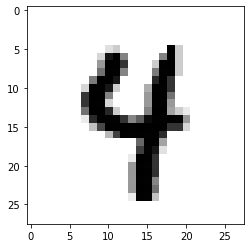

In [16]:
randi = randint(0,len(testdata))
plt.imshow(testdata_[randi],cmap='binary')
print('predicted value = '+str(np.argmax(predict[randi])))

# show loss and accuracy data in chart

In [17]:
history_dict = history.history

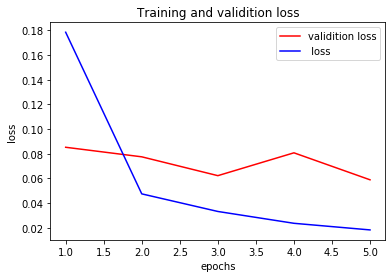

In [18]:
epochs = range(1,len(history_dict['acc'])+1)
plt.plot(epochs ,history_dict['val_loss'],'r-',label='validition loss')
plt.plot(epochs ,history_dict['loss'],'b',label=' loss')
plt.title('Training and validition loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

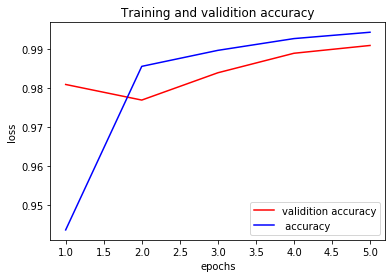

In [19]:
epochs = range(1,len(history_dict['acc'])+1)
plt.plot(epochs ,history_dict['val_acc'],'r-',label='validition accuracy')
plt.plot(epochs ,history_dict['acc'],'b',label=' accuracy')
plt.title('Training and validition accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#github.com/aidinze